# DES 
It is a program to encrypt and decrypt a plaintext over DES encryption algorithm. Input size = 64 bits, Output size = 64 bits, Key length = 56 bits

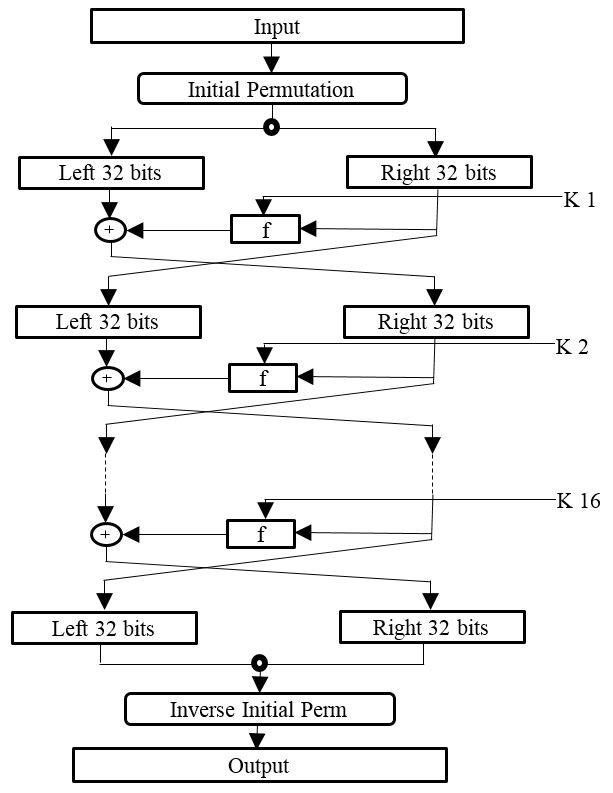

## Key generation

In [1]:
# Convert key input from a Hex to binary
key_hex = input("Enter The Key in Hex (16 digits):\n") # taking input as hex so that it is easy to work with 
                                                            #    binary sequence later
try:
    (int(key_hex, 16)) 
except:
    print ("That is an invalid hex value")
if len(key_hex) == 16:    
    pass
else:
    raise ValueError('error')
    
key_bin = bin(int(key_hex, 16))[2:].zfill(64)

k= []
k.append(0)
for digit in str(key_bin):
    k.append(int(digit))
    
# arrays to define 56 bit key 

# C array
keyLeft =      [k[57],k[49],k[41],k[33],
         k[25],k[17],k[9], k[1],
         k[58],k[50],k[42],k[34],
         k[26],k[18],k[10],k[2],
         k[59],k[51],k[43],k[35],
         k[27],k[19],k[11],k[3],
         k[60],k[52],k[44],k[36]]
# D array
keyRight =      [k[63],k[55],k[47],k[39],
         k[31],k[23],k[15],k[7],
         k[62],k[54],k[46],k[38],
         k[30],k[22],k[14],k[6],
         k[61],k[53],k[45],k[37],
         k[29],k[21],k[13],k[5],
         k[28],k[20],k[12],k[4]]

key56 = keyLeft + keyRight
len(key56)

Enter The Key in Hex (16 digits):
bbbbcccddd567890


56

In [21]:
shift = [1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1]

#Key Generator For Encryption Algorithm


# Rotation Function
def rotation(rot_num):

    global keyLeft, keyRight
    keyLeft = keyLeft[shift[rot_num]:] + keyLeft [:shift[rot_num]]
    keyRight = keyRight[shift[rot_num]:] + keyRight[:shift[rot_num]]
    rot = keyLeft + keyRight 
    return (rot)

key={}
pc2=[]

# Generator Function
def generateKey(x):
    key[x] = rotation(x)
    pc2=[key[(x)][14-1],key[(x)][17-1],key[(x)][11-1],key[(x)][24-1],key[(x)][1-1],
         key[(x)][5-1], key[(x)][3-1], key[(x)][28-1],key[(x)][15-1],key[(x)][6-1],
         key[(x)][21-1],key[(x)][10-1],key[(x)][23-1],key[(x)][19-1],key[(x)][12-1],
         key[(x)][4-1], key[(x)][26-1],key[(x)][8-1], key[(x)][16-1],key[(x)][7-1],
         key[(x)][27-1],key[(x)][20-1],key[(x)][13-1],key[(x)][2-1], key[(x)][41-1],
         key[(x)][52-1],key[(x)][31-1],key[(x)][37-1],key[(x)][47-1],key[(x)][55-1],
         key[(x)][30-1],key[(x)][40-1],key[(x)][51-1],key[(x)][45-1],key[(x)][33-1],
         key[(x)][48-1],key[(x)][44-1],key[(x)][49-1],key[(x)][39-1],key[(x)][56-1],
         key[(x)][34-1],key[(x)][53-1],key[(x)][46-1],key[(x)][42-1],key[(x)][50-1],
         key[(x)][36-1],key[(x)][29-1],key[(x)][32-1]]
    return pc2

## DES Encryption

In [23]:
# User input

# Convert plaintext input from a Hex to binary 

pt_hex = input("Enter The PlainText in Hex (16 digits):\n") # taking input in binary for 64 bit is not the best choice.

try:
    (int(pt_hex, 16))  #if the value is not base 16
except:
    print ("That is an invalid hex value")
    
if len(pt_hex) == 16:    # if the value is not equal to 16 digits, raise error.
    pass
else: 
    raise ValueError('error')
    
#converting hex to binary
pt_bin = bin(int(pt_hex, 16))[2:].zfill(64)

pt= []
pt.append(0) # to fill up 1st position in the list
for digit in str(pt_bin):
    pt.append(int(digit))

Enter The PlainText in Hex (16 digits):
0123456789abcdef


In [24]:
# Initial permutation
IP=        [pt[58], pt[50], pt[42], pt[34], pt[26], pt[18], pt[10], pt[2], 
            pt[60], pt[52], pt[44], pt[36], pt[28], pt[20], pt[12], pt[4], 
            pt[62], pt[54], pt[46], pt[38], pt[30], pt[22], pt[14], pt[6], 
            pt[64], pt[56], pt[48], pt[40], pt[32], pt[24], pt[16], pt[8], 
            pt[57], pt[49], pt[41], pt[33], pt[25], pt[17], pt[9],  pt[1], 
            pt[59], pt[51], pt[43], pt[35], pt[27], pt[19], pt[11], pt[3], 
            pt[61], pt[53], pt[45], pt[37], pt[29], pt[21], pt[13], pt[5], 
            pt[63], pt[55], pt[47], pt[39], pt[31], pt[23], pt[15], pt[7]]
len(IP)

64

In [25]:
#Permutation Function

def permutation(perm):
    result =[perm[15], perm[6],  perm[19], perm[20], 
           perm[28], perm[11], perm[27], perm[16], 
           perm[0],  perm[14], perm[22], perm[25], 
           perm[4],  perm[17], perm[30], perm[9], 
           perm[1],  perm[7],  perm[23], perm[13], 
           perm[31], perm[26], perm[2],  perm[8], 
           perm[18], perm[12], perm[29], perm[5], 
           perm[21], perm[10], perm[3],  perm[24]]
    return (result)

In [26]:
#Left side of the list after peforming IP

Left_IP =    [pt[58], pt[50], pt[42], pt[34], pt[26], pt[18], pt[10], pt[2], 
             pt[60], pt[52], pt[44], pt[36], pt[28], pt[20], pt[12], pt[4], 
             pt[62], pt[54], pt[46], pt[38], pt[30], pt[22], pt[14], pt[6], 
             pt[64], pt[56], pt[48], pt[40], pt[32], pt[24], pt[16], pt[8]]

#Right side of the list after peforming IP

Right_IP =   [pt[57], pt[49], pt[41], pt[33], pt[25], pt[17], pt[9],  pt[1], 
             pt[59], pt[51], pt[43], pt[35], pt[27], pt[19], pt[11], pt[3], 
             pt[61], pt[53], pt[45], pt[37], pt[29], pt[21], pt[13], pt[5], 
             pt[63], pt[55], pt[47], pt[39], pt[31], pt[23], pt[15], pt[7]]

In [27]:
#Expand right side from 32 bits to 48 bits

def extend(ex):
    extended = [ex[31], ex[0],  ex[1],  ex[2],  ex[3],  ex[4], 
             ex[3],  ex[4],  ex[5],  ex[6],  ex[7],  ex[8], 
             ex[7],  ex[8],  ex[9],  ex[10], ex[11], ex[12], 
             ex[11], ex[12], ex[13], ex[14], ex[15], ex[16], 
             ex[15], ex[16], ex[17], ex[18], ex[19], ex[20], 
             ex[19], ex[20], ex[21], ex[22], ex[23], ex[24], 
             ex[23], ex[24], ex[25], ex[26], ex[27], ex[28], 
             ex[27], ex[28], ex[29], ex[30], ex[31], ex[0]]
    return (extended)

In [28]:
# S-Boxes defined
def S_Boxes():
    S1 =    [[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
             [0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
             [4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
             [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13]]
    S2 =    [[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
             [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
             [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
             [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9]]
    S3 =    [[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
             [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
             [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
             [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12]]
    S4 =    [[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
             [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
             [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
             [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14]]
    S5 =    [[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
             [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
             [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
             [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3]]
    S6 =    [[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
             [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
             [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
             [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13]]
    S7 =    [[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
             [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
             [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
             [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12]]
    S8 =    [[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
             [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
             [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
             [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11]]
    
    return [S1, S2, S3, S4, S5, S6, S7, S8]

In [29]:
print("Initial Permutation =",format(IP))
print("\nLeft ",format(Left_IP))
print("\nRight ",format(Right_IP))

Initial Permutation = [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]

Left  [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

Right  [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [30]:
import itertools # for efficient looping
ExtendedRight=extend(Right_IP)

r=1
for x in shift:
    print("================================================================================")
    print ("==========")
    print ("Round ",format(r))
    print ("==========\n")
    r+=1
    print("Expanded Right ",format(ExtendedRight))
    
    new=[]
    key=generateKey(x)
    print("Round Key ",format(key))
    
    for i in range(48):
            new.append(ExtendedRight[i] ^ key[i])     # xor operation
       
    print("XOR result",format(new))

    new= list(map(str, new)) # mapping to string 
    temp=0
    temp1=[]
    s_box = S_Boxes()
    y=0
    
    for x in range (0,48,6):
        temp = s_box[y][int(''.join(new[x]+new[x+5]),2)][int(''.join(new[x+1:x+5]),2)]
        if y < 8: 
            y += 1
        temp=(bin(int(temp))[2:].zfill(4))
        temp1.append([int(i) for i in str(temp)])
      
    temp1 = list(itertools.chain(*temp1))
    print("F Function output ",format(temp1))
    temp1 = permutation(temp1)
    print("Output of permutation function ",format(temp1))
    temp2 = []
    for i in range(32):
                 
            temp2.append(temp1[i] ^ Left_IP[i])
    Left_IP = Right_IP
    Right_IP = temp2
    if r==17:
        break
    print("New Right ",format(Right_IP))
    print("New Left ",format(Left_IP))
    ExtendedRight=extend(Right_IP)

Round  1

Expanded Right  [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Round Key  [1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
XOR result [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
F Function output  [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
Output of permutation function  [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
New Right  [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1]
New Left  [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Round  2

Expanded Right  [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 

In [31]:
Right_IP, Left_IP = Left_IP, Right_IP #swapping
res = Left_IP + Right_IP

# IP inverse
invIP =    [res[39], res[7], res[47], res[15], res[55], res[23], res[63], res[31], 
            res[38], res[6], res[46], res[14], res[54], res[22], res[62], res[30], 
            res[37], res[5], res[45], res[13], res[53], res[21], res[61], res[29], 
            res[36], res[4], res[44], res[12], res[52], res[20], res[60], res[28], 
            res[35], res[3], res[43], res[11], res[51], res[19], res[59], res[27], 
            res[34], res[2], res[42], res[10], res[50], res[18], res[58], res[26], 
            res[33], res[1], res[41], res[9],  res[49], res[17], res[57], res[25], 
            res[32], res[0], res[40], res[8],  res[48], res[16], res[56], res[24]]


In [32]:
print("================================================================================\n")            
print("CipherText in Binary = ",format(invIP))
invIP= list(map(str, invIP))
invIP=''.join(invIP)
invIP=hex(int(invIP, 2))[2:].zfill(16)
print("CipherText in Hex = ",format(invIP))


CipherText in Binary =  [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]
CipherText in Hex =  e24429cccde55982
